In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r'/content/train.csv')

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.duplicated().any()

False

In [7]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.shape

(404287, 6)

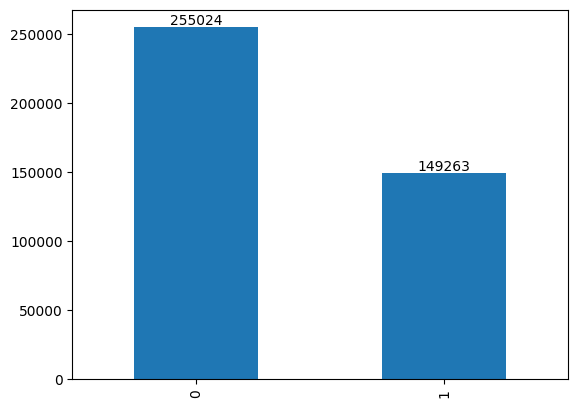

In [10]:
ax=df['is_duplicate'].value_counts().plot(kind='bar')
for bars in ax.containers:
  ax.bar_label(bars)

In [11]:
df['is_duplicate'].value_counts()/len(df['is_duplicate'])*100

0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64

In [12]:
ques=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())

In [13]:
unique=np.unique(ques)

In [14]:
print('Number of unique Questions : ',unique.shape[0])
print('Number of repeated questions : ',len(ques)-unique.shape[0])

Number of unique Questions :  537929
Number of repeated questions :  270645


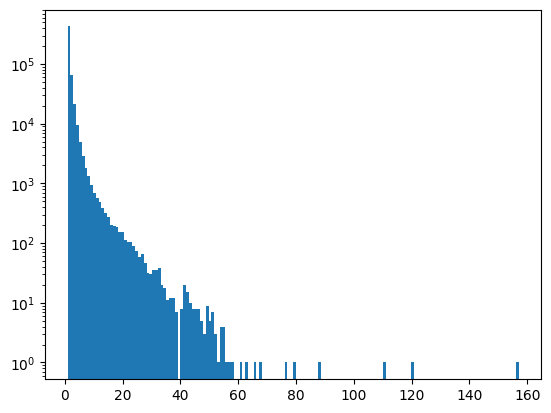

In [15]:
plt.hist(ques.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [16]:
temp=df

In [17]:
df['len_1']=df['question1'].str.len()

In [18]:
df['len_2']=df['question2'].str.len()

In [19]:
df

,id,qid1,qid2,question1,question2,is_duplicate,len_1,len_2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39
...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,85,79
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,41,42
404287,404287,537928,537929,What is one coin?,What's this coin?,0,17,17
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,94,127


In [20]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
len_1           0
len_2           0
dtype: int64

In [21]:
df['question1']=df['question1'].str.lower()

In [22]:
df['question2']=df['question2'].str.lower()

In [23]:
df

,id,qid1,qid2,question1,question2,is_duplicate,len_1,len_2
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0,51,88
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59
3,3,7,8,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0,50,65
4,4,9,10,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0,76,39
...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,85,79
404286,404286,18840,155606,do you believe there is life after death?,is it true that there is life after death?,1,41,42
404287,404287,537928,537929,what is one coin?,what's this coin?,0,17,17
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,94,127


In [24]:
df['num_words_1']=df['question1'].apply(lambda x: len(str.split(x)))

In [25]:
df

,id,qid1,qid2,question1,question2,is_duplicate,len_1,len_2,num_words_1
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0,51,88,8
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14
3,3,7,8,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0,50,65,11
4,4,9,10,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0,76,39,13
...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,85,79,14
404286,404286,18840,155606,do you believe there is life after death?,is it true that there is life after death?,1,41,42,8
404287,404287,537928,537929,what is one coin?,what's this coin?,0,17,17,4
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,94,127,17


In [26]:
df['num_words_2']=df['question2'].apply(lambda x: len(str.split(x)))

In [27]:
df

,id,qid1,qid2,question1,question2,is_duplicate,len_1,len_2,num_words_1,num_words_2
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0,51,88,8,13
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10
3,3,7,8,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9
4,4,9,10,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0,76,39,13,7
...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,85,79,14,13
404286,404286,18840,155606,do you believe there is life after death?,is it true that there is life after death?,1,41,42,8,9
404287,404287,537928,537929,what is one coin?,what's this coin?,0,17,17,4,3
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,94,127,17,25


In [28]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [29]:
df['temp1']=df['question1'].apply(lambda x: word_tokenize(x))
df['temp2']=df['question2'].apply(lambda y: word_tokenize(y))

In [30]:
df['set1']=df['temp1'].apply(lambda x: set(x))
df['set2']=df['temp2'].apply(lambda x: set(x))

In [31]:
df

,id,qid1,qid2,question1,question2,is_duplicate,len_1,len_2,num_words_1,num_words_2,temp1,temp2,set1,set2
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv...","{market, india, is, step, guide, in, by, the, ...","{market, is, step, guide, in, by, the, invest,..."
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0,51,88,8,13,"[what, is, the, story, of, kohinoor, (, koh-i-...","[what, would, happen, if, the, indian, governm...","{), is, diamond, story, (, of, kohinoor, ?, th...","{stole, would, ), diamond, if, happen, (, back..."
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,...","{internet, increase, my, how, i, speed, of, wh...","{internet, hacking, dns, how, increased, throu..."
3,3,7,8,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,"[why, am, i, mentally, very, lonely, ?, how, c...","[find, the, remainder, when, [, math, ], 23^, ...","{why, mentally, very, solve, am, i, how, can, ...","{remainder, find, 24,23, [, math, 24, 23^, /ma..."
4,4,9,10,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0,76,39,13,7,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water, ?]","{quikly, methane, one, di, carbon, which, and,...","{would, which, water, survive, in, ?, salt, fish}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,85,79,14,13,"[how, many, keywords, are, there, in, the, rac...","[how, many, keywords, are, there, in, perl, pr...","{racket, keywords, how, language, latest, vers...","{keywords, how, language, latest, version, man..."
404286,404286,18840,155606,do you believe there is life after death?,is it true that there is life after death?,1,41,42,8,9,"[do, you, believe, there, is, life, after, dea...","[is, it, true, that, there, is, life, after, d...","{do, after, is, death, life, ?, believe, you, ...","{that, after, is, true, death, life, ?, it, th..."
404287,404287,537928,537929,what is one coin?,what's this coin?,0,17,17,4,3,"[what, is, one, coin, ?]","[what, 's, this, coin, ?]","{one, is, ?, coin, what}","{this, 's, coin, ?, what}"
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,94,127,17,25,"[what, is, the, approx, annual, cost, of, livi...","[i, am, having, little, hairfall, problem, but...","{studying, for, uic, in, an, chicago, is, appr...","{problem, but, wax, product, should, one, pref..."


In [32]:
def process(x):
  return len(x['set1'].intersection(x['set2']))

In [33]:
df['common_elements']=df.apply(process,axis=1)

In [34]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,len_1,len_2,num_words_1,num_words_2,temp1,temp2,set1,set2,common_elements
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv...","{market, india, is, step, guide, in, by, the, ...","{market, is, step, guide, in, by, the, invest,...",12
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0,51,88,8,13,"[what, is, the, story, of, kohinoor, (, koh-i-...","[what, would, happen, if, the, indian, governm...","{), is, diamond, story, (, of, kohinoor, ?, th...","{stole, would, ), diamond, if, happen, (, back...",8
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,...","{internet, increase, my, how, i, speed, of, wh...","{internet, hacking, dns, how, increased, throu...",5
3,3,7,8,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,"[why, am, i, mentally, very, lonely, ?, how, c...","[find, the, remainder, when, [, math, ], 23^, ...","{why, mentally, very, solve, am, i, how, can, ...","{remainder, find, 24,23, [, math, 24, 23^, /ma...",1
4,4,9,10,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0,76,39,13,7,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water, ?]","{quikly, methane, one, di, carbon, which, and,...","{would, which, water, survive, in, ?, salt, fish}",5


In [35]:
def tot(x):
  return len(x['set1'].union(x['set2']))

In [36]:
df['total_words']=df.apply(tot,axis=1)

In [37]:
df

,id,qid1,qid2,question1,question2,is_duplicate,len_1,len_2,num_words_1,num_words_2,temp1,temp2,set1,set2,common_elements,total_words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv...","{market, india, is, step, guide, in, by, the, ...","{market, is, step, guide, in, by, the, invest,...",12,13
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0,51,88,8,13,"[what, is, the, story, of, kohinoor, (, koh-i-...","[what, would, happen, if, the, indian, governm...","{), is, diamond, story, (, of, kohinoor, ?, th...","{stole, would, ), diamond, if, happen, (, back...",8,18
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,...","{internet, increase, my, how, i, speed, of, wh...","{internet, hacking, dns, how, increased, throu...",5,21
3,3,7,8,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,"[why, am, i, mentally, very, lonely, ?, how, c...","[find, the, remainder, when, [, math, ], 23^, ...","{why, mentally, very, solve, am, i, how, can, ...","{remainder, find, 24,23, [, math, 24, 23^, /ma...",1,27
4,4,9,10,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0,76,39,13,7,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water, ?]","{quikly, methane, one, di, carbon, which, and,...","{would, which, water, survive, in, ?, salt, fish}",5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,85,79,14,13,"[how, many, keywords, are, there, in, the, rac...","[how, many, keywords, are, there, in, perl, pr...","{racket, keywords, how, language, latest, vers...","{keywords, how, language, latest, version, man...",12,15
404286,404286,18840,155606,do you believe there is life after death?,is it true that there is life after death?,1,41,42,8,9,"[do, you, believe, there, is, life, after, dea...","[is, it, true, that, there, is, life, after, d...","{do, after, is, death, life, ?, believe, you, ...","{that, after, is, true, death, life, ?, it, th...",6,12
404287,404287,537928,537929,what is one coin?,what's this coin?,0,17,17,4,3,"[what, is, one, coin, ?]","[what, 's, this, coin, ?]","{one, is, ?, coin, what}","{this, 's, coin, ?, what}",3,7
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,94,127,17,25,"[what, is, the, approx, annual, cost, of, livi...","[i, am, having, little, hairfall, problem, but...","{studying, for, uic, in, an, chicago, is, appr...","{problem, but, wax, product, should, one, pref...",3,42


In [38]:
df=df.drop(columns=['temp1','temp2','set1','set2'])

In [39]:
df

,id,qid1,qid2,question1,question2,is_duplicate,len_1,len_2,num_words_1,num_words_2,common_elements,total_words
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12,12,13
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0,51,88,8,13,8,18
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10,5,21
3,3,7,8,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,1,27
4,4,9,10,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0,76,39,13,7,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,85,79,14,13,12,15
404286,404286,18840,155606,do you believe there is life after death?,is it true that there is life after death?,1,41,42,8,9,6,12
404287,404287,537928,537929,what is one coin?,what's this coin?,0,17,17,4,3,3,7
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,94,127,17,25,3,42


In [40]:
df['ratio']=round(df['common_elements']/df['total_words'],2)

In [41]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,len_1,len_2,num_words_1,num_words_2,common_elements,total_words,ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12,12,13,0.92
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0,51,88,8,13,8,18,0.44
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10,5,21,0.24
3,3,7,8,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,1,27,0.04
4,4,9,10,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0,76,39,13,7,5,18,0.28


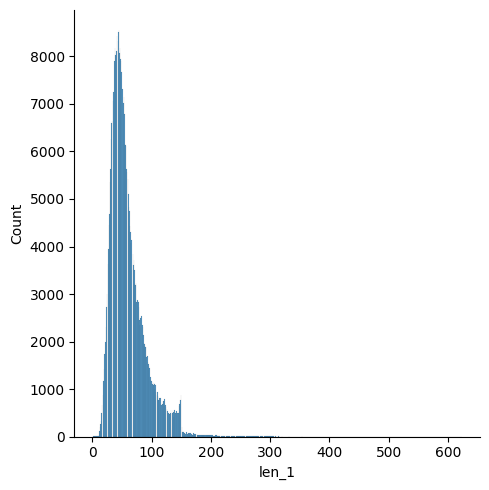

In [42]:
sns.displot(data=df,x='len_1')

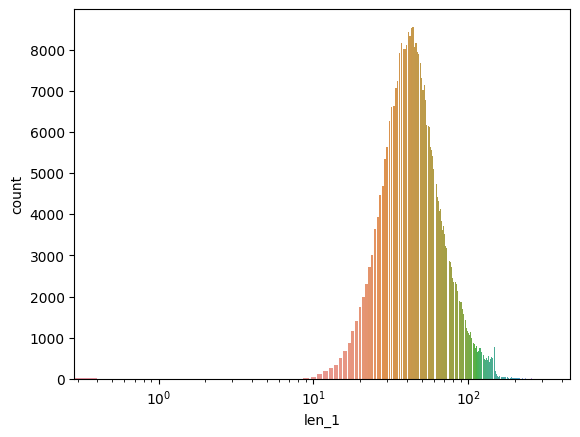

In [43]:
sns.countplot(data=df,x='len_1')
plt.xscale('log')

<ipython-input-44-0767e22ab42d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==0]['common_elements'],label='NOT DUPLICATE')
<ipython-input-44-0767e22ab42d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==1]['common_elements'],label='DUPLICATE')


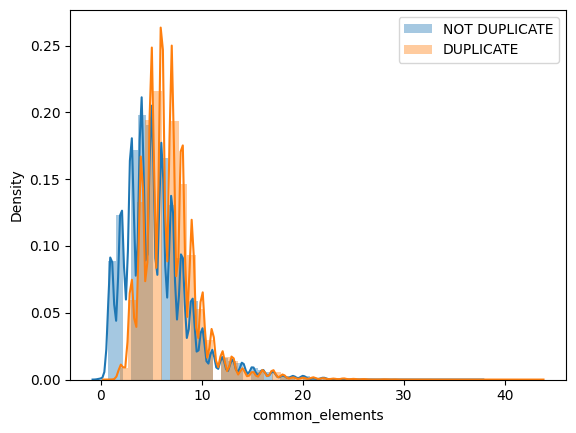

In [44]:
sns.distplot(df[df['is_duplicate']==0]['common_elements'],label='NOT DUPLICATE')
sns.distplot(df[df['is_duplicate']==1]['common_elements'],label='DUPLICATE')
plt.legend()
plt.show()

<ipython-input-45-6c3da540f8d8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==0]['total_words'],label='NOT DUPLICATE')
<ipython-input-45-6c3da540f8d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==1]['total_words'],label='DUPLICATE')


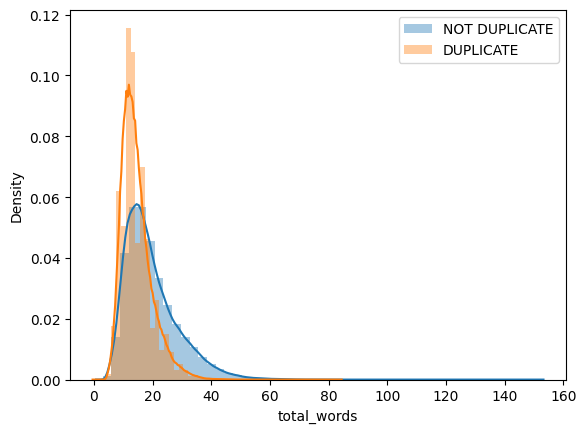

In [45]:
sns.distplot(df[df['is_duplicate']==0]['total_words'],label='NOT DUPLICATE')
sns.distplot(df[df['is_duplicate']==1]['total_words'],label='DUPLICATE')
plt.legend()
plt.show()

<ipython-input-46-54bd57cfe0c1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==0]['ratio'],label='NOT DUPLICATE')
<ipython-input-46-54bd57cfe0c1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['is_duplicate']==1]['ratio'],label='DUPLICATE')


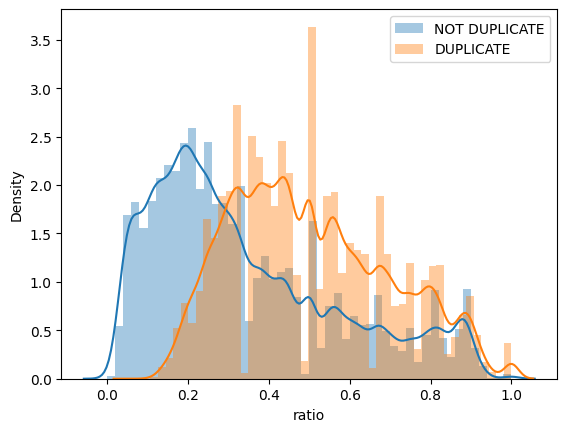

In [46]:
sns.distplot(df[df['is_duplicate']==0]['ratio'],label='NOT DUPLICATE')
sns.distplot(df[df['is_duplicate']==1]['ratio'],label='DUPLICATE')
plt.legend()
plt.show()

In [47]:
import string
from nltk.corpus import stopwords

In [48]:
p=string.punctuation

In [49]:
p

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
nltk.download('stopwords')
s=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [51]:
s

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
df['mean']=(df['len_1']+df['len_2'])/2

In [53]:
df['diff']=abs(df['len_1']-df['len_2'])

In [54]:
corr=df.corr()

<ipython-input-54-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

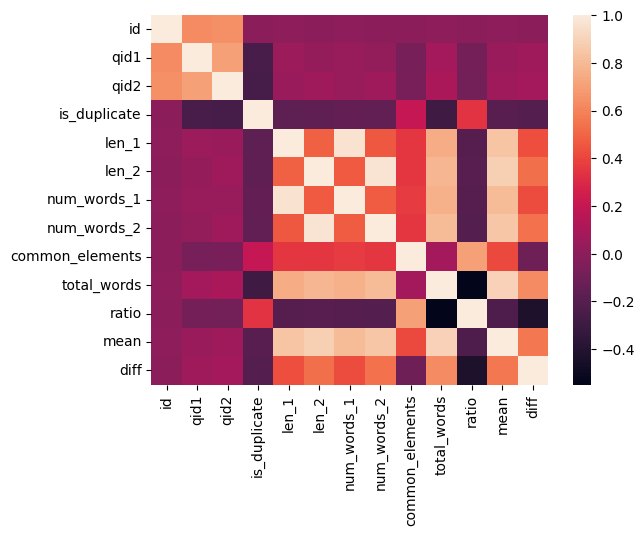

In [55]:
sns.heatmap(corr)

In [56]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'len_1',
       'len_2', 'num_words_1', 'num_words_2', 'common_elements', 'total_words',
       'ratio', 'mean', 'diff'],
      dtype='object')

In [57]:
df.dtypes

id                   int64
qid1                 int64
qid2                 int64
question1           object
question2           object
is_duplicate         int64
len_1                int64
len_2                int64
num_words_1          int64
num_words_2          int64
common_elements      int64
total_words          int64
ratio              float64
mean               float64
diff                 int64
dtype: object

In [58]:
w1=df['question1'].head(1).values[0]

In [59]:
w1

'what is the step by step guide to invest in share market in india?'

In [60]:
w2=df['question2'].head(1).values[0]

In [61]:
w2

'what is the step by step guide to invest in share market?'

In [62]:
if(w1.split()[0]==w2.split()[0]):
  print(1)
else:
  print(0)

1


In [63]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate', 'len_1',
       'len_2', 'num_words_1', 'num_words_2', 'common_elements', 'total_words',
       'ratio', 'mean', 'diff'],
      dtype='object')

In [64]:
data=df.drop(columns=['id','qid1','qid2','question1','question2'])

In [65]:
data.head()

,is_duplicate,len_1,len_2,num_words_1,num_words_2,common_elements,total_words,ratio,mean,diff
0,0,66,57,14,12,12,13,0.92,61.5,9
1,0,51,88,8,13,8,18,0.44,69.5,37
2,0,73,59,14,10,5,21,0.24,66.0,14
3,0,50,65,11,9,1,27,0.04,57.5,15
4,0,76,39,13,7,5,18,0.28,57.5,37


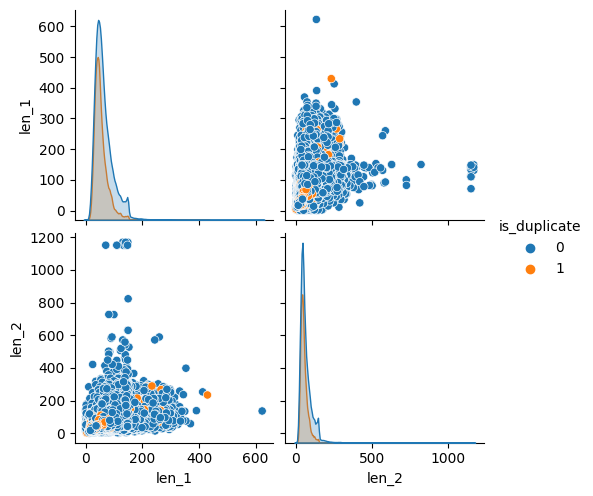

In [66]:
sns.pairplot(data[['len_1','len_2','is_duplicate']],hue='is_duplicate')

In [67]:
from sklearn.model_selection import train_test_split
X=data[['len_1','len_2','num_words_1','num_words_2','common_elements','total_words','ratio','mean','diff']]

In [68]:
y=data['is_duplicate']

In [69]:
X

,len_1,len_2,num_words_1,num_words_2,common_elements,total_words,ratio,mean,diff
0,66,57,14,12,12,13,0.92,61.5,9
1,51,88,8,13,8,18,0.44,69.5,37
2,73,59,14,10,5,21,0.24,66.0,14
3,50,65,11,9,1,27,0.04,57.5,15
4,76,39,13,7,5,18,0.28,57.5,37
...,...,...,...,...,...,...,...,...,...
404285,85,79,14,13,12,15,0.80,82.0,6
404286,41,42,8,9,6,12,0.50,41.5,1
404287,17,17,4,3,3,7,0.43,17.0,0
404288,94,127,17,25,3,42,0.07,110.5,33


In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf=RandomForestClassifier()

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
y_pred=rf.predict(X_test)
a=accuracy_score(y_test,y_pred)

In [76]:
a

0.6916198768210937

In [77]:
df

,id,qid1,qid2,question1,question2,is_duplicate,len_1,len_2,num_words_1,num_words_2,common_elements,total_words,ratio,mean,diff
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12,12,13,0.92,61.5,9
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0,51,88,8,13,8,18,0.44,69.5,37
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10,5,21,0.24,66.0,14
3,3,7,8,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,1,27,0.04,57.5,15
4,4,9,10,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0,76,39,13,7,5,18,0.28,57.5,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,85,79,14,13,12,15,0.80,82.0,6
404286,404286,18840,155606,do you believe there is life after death?,is it true that there is life after death?,1,41,42,8,9,6,12,0.50,41.5,1
404287,404287,537928,537929,what is one coin?,what's this coin?,0,17,17,4,3,3,7,0.43,17.0,0
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,94,127,17,25,3,42,0.07,110.5,33


In [78]:
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
cv=CountVectorizer(max_features=3000)
df=df.sample(50000)

In [80]:
questions=list(df['question1'])+list(df['question2'])

In [81]:
a1,a2=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [82]:
d1=pd.DataFrame(a1,index=df.index)
d2=pd.DataFrame(a2,index=df.index)
d3=pd.concat([d1,d2],axis=1)
d3.shape

(50000, 6000)

In [83]:
df=pd.concat([d3,df],axis=1)

In [ ]:
final_data=df.drop(columns=['id','qid1','qid2','question1','question2'])

In [ ]:
from sklearn.model_selection import train_test_split
x=final_data.drop(columns=['is_duplicate'])
Y=final_data['is_duplicate']
x_train,x_test,Y_train,Y_test=train_test_split(x,Y)
from xgboost import XGBClassifier
xgb=XGBoostClassifier()
xgb.fit(x_train,Y_train)
Y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score
a=accuracy_score(Y_test,Y_pred)